# Explore data augmentations

This notebook will be used to test different data augmentation strategies. In your config file, you can modify the augmentations by adding `data_augmentation_options`. For example, I would like to add a random RGB to gray transform with a probability of 0.2:
```
data_augmentation_options {
    random_rgb_to_gray {
    probability: 0.2
    }
```

A complete list of augmentation is provided the [`preprocessor.proto` file of the Tf Object Detection API](https://github.com/tensorflow/models/blob/master/research/object_detection/protos/preprocessor.proto).

### Helper functions

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

In [2]:
def recenter_image(image):
    # ssd preprocessing
    image += [123.68, 116.779, 103.939]
    return image

def display_instances(image, bboxes, classes):
    image = recenter_image(image)
    w, h, _ = image.shape
    # resize the bboxes
    bboxes[:, [0, 2]] *= w
    bboxes[:, [1, 3]] *= h
    
    f, ax = plt.subplots(1, figsize=(10, 10))
    ax.imshow(image.astype(np.uint8))
    for bb, cl in zip(bboxes, classes):
        y1, x1, y2, x2 = bb
        rec = Rectangle((x1, y1), x2-x1, y2-y1, facecolor='none', edgecolor='r', linewidth=2)
        ax.add_patch(rec)
    plt.show()

def display_batch(batch):
    # get images, bboxes and classes
    batched_images = batch[0]['image'].numpy()
    batched_bboxes = batch[1]['groundtruth_boxes'].numpy()
    batched_classes = batch[1]['groundtruth_classes'].numpy()
    num_bboxes = batch[1]['num_groundtruth_boxes'].numpy()
    batch_size = batched_images.shape[0]
    for idx in range(batch_size):
        display_instances(batched_images[idx, ...], 
                          batched_bboxes[idx, :num_bboxes[idx], :],
                          batched_classes[idx, ...])

### Display augmentations

In [3]:
from utils import get_train_input

In [6]:
# Augmentation 1: Change RGB images to gray scale with a probability of 0.2.
train_dataset = get_train_input("./training/reference/augmentation1/pipeline_augmentation1.config")

INFO:tensorflow:Reading unweighted datasets: ['/app/project/data/splits/train/segment-11971497357570544465_1200_000_1220_000_with_camera_labels.tfrecord', '/app/project/data/splits/train/segment-11623618970700582562_2840_367_2860_367_with_camera_labels.tfrecord', '/app/project/data/splits/train/segment-10153695247769592104_787_000_807_000_with_camera_labels.tfrecord', '/app/project/data/splits/train/segment-10072231702153043603_5725_000_5745_000_with_camera_labels.tfrecord', '/app/project/data/splits/train/segment-11060291335850384275_3761_210_3781_210_with_camera_labels.tfrecord', '/app/project/data/splits/train/segment-11846396154240966170_3540_000_3560_000_with_camera_labels.tfrecord', '/app/project/data/splits/train/segment-10786629299947667143_3440_000_3460_000_with_camera_labels.tfrecord', '/app/project/data/splits/train/segment-10923963890428322967_1445_000_1465_000_with_camera_labels.tfrecord', '/app/project/data/splits/train/segment-10526338824408452410_5714_660_5734_660_with_

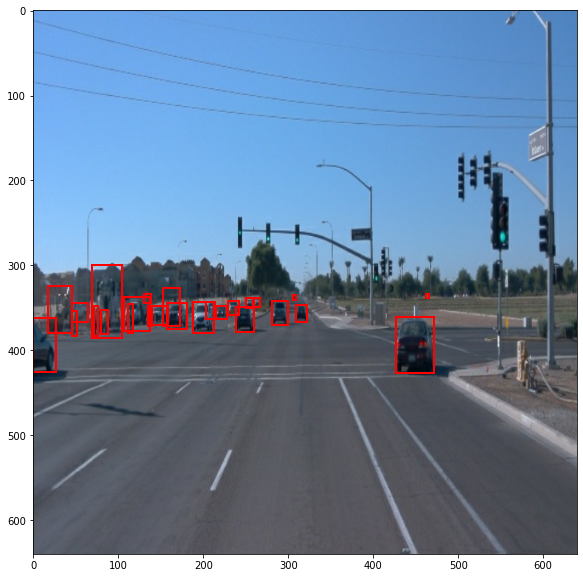

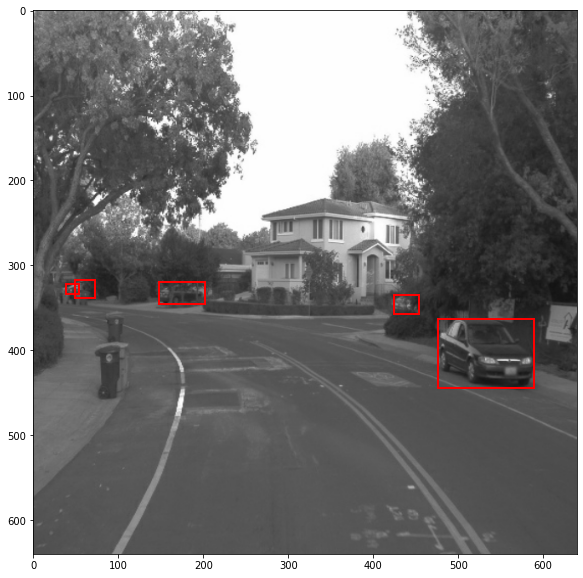

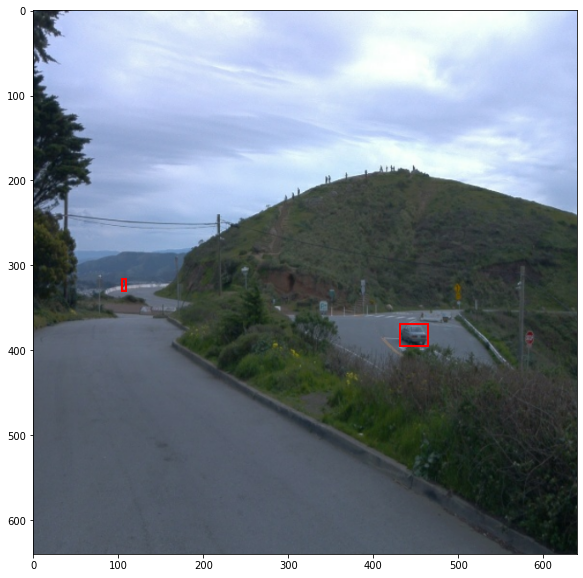

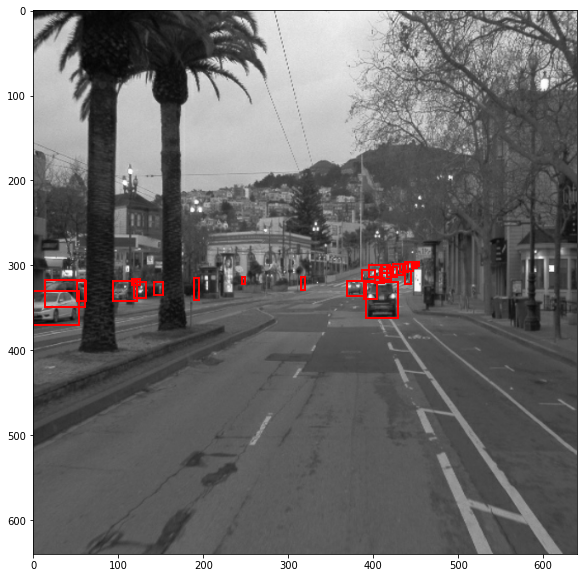

In [7]:
%matplotlib inline

for batch in train_dataset.take(1):
    display_batch(batch)

In [11]:
# Augmentation 3: Add random_scale_crop_and_pad_to_square augmentation to Augmentation 1.
train_dataset = get_train_input("./training/reference/augmentation3/pipeline_augmentation3.config")

INFO:tensorflow:Reading unweighted datasets: ['/app/project/data/splits/train/segment-11971497357570544465_1200_000_1220_000_with_camera_labels.tfrecord', '/app/project/data/splits/train/segment-11623618970700582562_2840_367_2860_367_with_camera_labels.tfrecord', '/app/project/data/splits/train/segment-10153695247769592104_787_000_807_000_with_camera_labels.tfrecord', '/app/project/data/splits/train/segment-10072231702153043603_5725_000_5745_000_with_camera_labels.tfrecord', '/app/project/data/splits/train/segment-11060291335850384275_3761_210_3781_210_with_camera_labels.tfrecord', '/app/project/data/splits/train/segment-11846396154240966170_3540_000_3560_000_with_camera_labels.tfrecord', '/app/project/data/splits/train/segment-10786629299947667143_3440_000_3460_000_with_camera_labels.tfrecord', '/app/project/data/splits/train/segment-10923963890428322967_1445_000_1465_000_with_camera_labels.tfrecord', '/app/project/data/splits/train/segment-10526338824408452410_5714_660_5734_660_with_

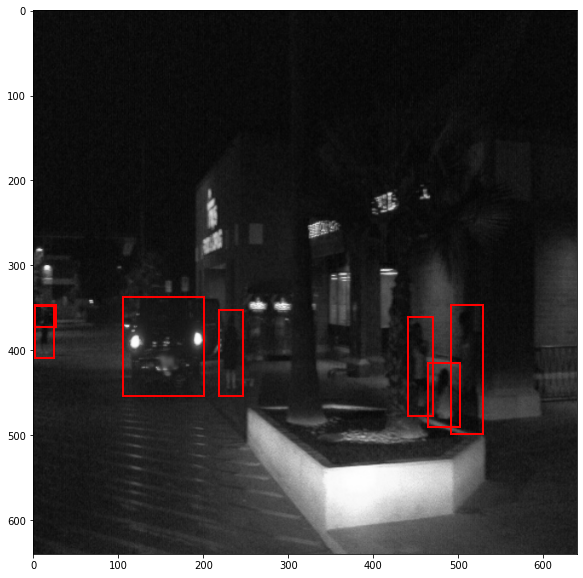

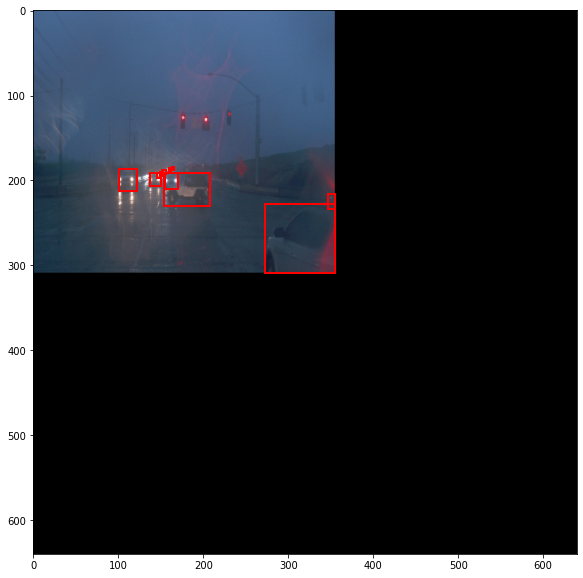

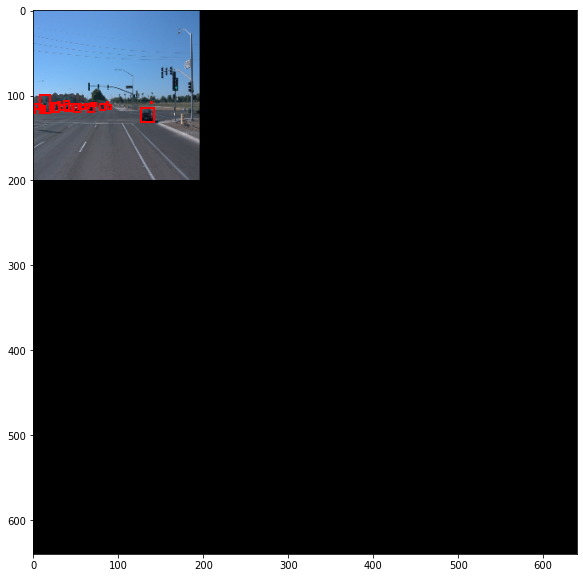

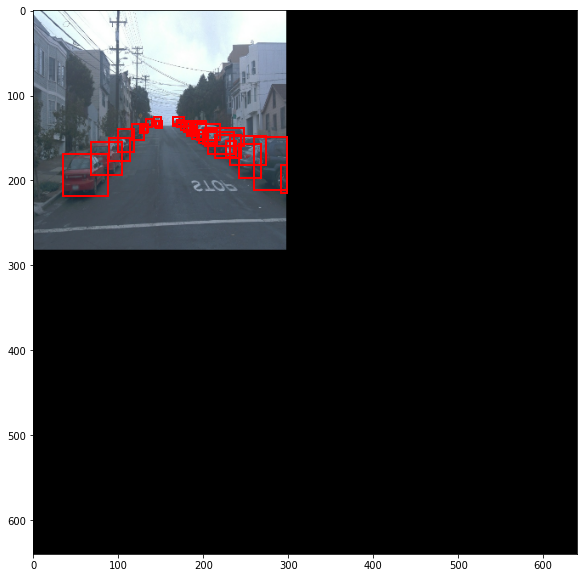

In [12]:
for batch in train_dataset.take(1):
    display_batch(batch)

In [15]:
# Augmentation 4: Add random_adjust_brightness augmentation to Augmentation 1.
train_dataset = get_train_input("./training/reference/augmentation4/pipeline_augmentation4.config")

INFO:tensorflow:Reading unweighted datasets: ['/app/project/data/splits/train/segment-11971497357570544465_1200_000_1220_000_with_camera_labels.tfrecord', '/app/project/data/splits/train/segment-11623618970700582562_2840_367_2860_367_with_camera_labels.tfrecord', '/app/project/data/splits/train/segment-10153695247769592104_787_000_807_000_with_camera_labels.tfrecord', '/app/project/data/splits/train/segment-10072231702153043603_5725_000_5745_000_with_camera_labels.tfrecord', '/app/project/data/splits/train/segment-11060291335850384275_3761_210_3781_210_with_camera_labels.tfrecord', '/app/project/data/splits/train/segment-11846396154240966170_3540_000_3560_000_with_camera_labels.tfrecord', '/app/project/data/splits/train/segment-10786629299947667143_3440_000_3460_000_with_camera_labels.tfrecord', '/app/project/data/splits/train/segment-10923963890428322967_1445_000_1465_000_with_camera_labels.tfrecord', '/app/project/data/splits/train/segment-10526338824408452410_5714_660_5734_660_with_

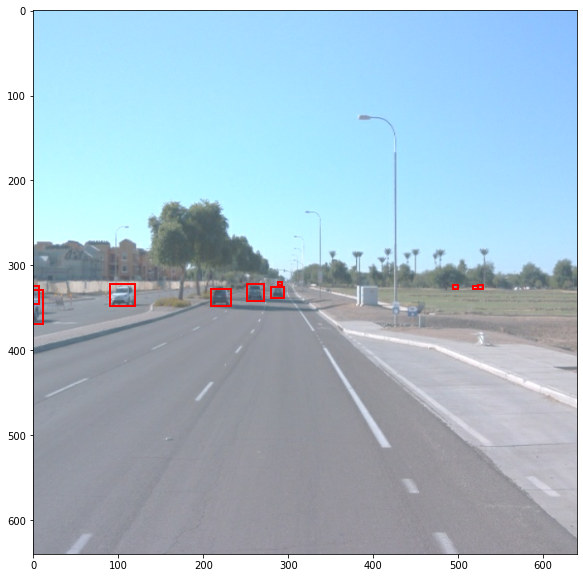

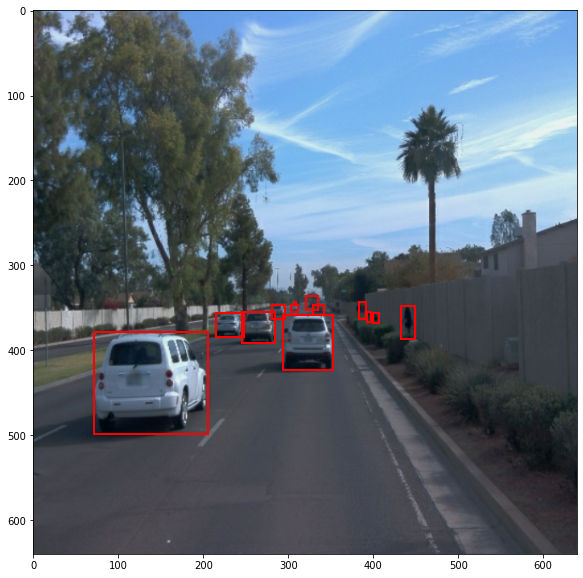

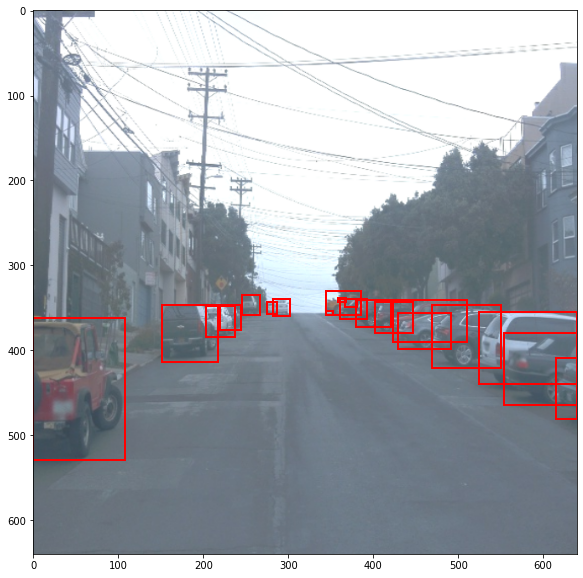

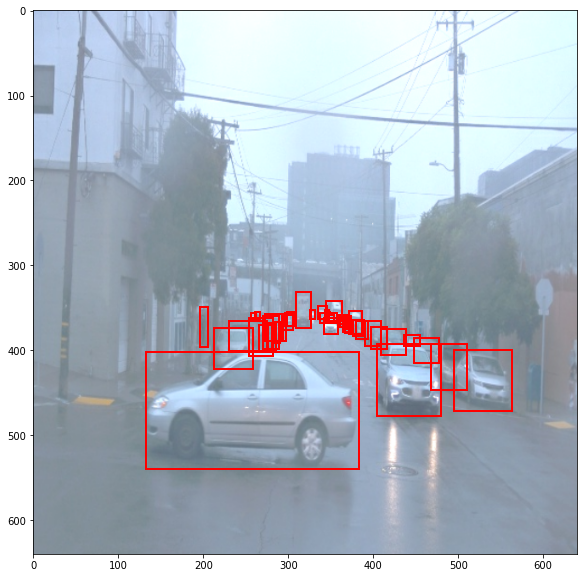

In [16]:
for batch in train_dataset.take(1):
    display_batch(batch)

In [17]:
# Augmentation 5: Add random_black_patches augmentation to Augmentation 1.
train_dataset = get_train_input("./training/reference/augmentation5/pipeline_augmentation5.config")

INFO:tensorflow:Reading unweighted datasets: ['/app/project/data/splits/train/segment-11971497357570544465_1200_000_1220_000_with_camera_labels.tfrecord', '/app/project/data/splits/train/segment-11623618970700582562_2840_367_2860_367_with_camera_labels.tfrecord', '/app/project/data/splits/train/segment-10153695247769592104_787_000_807_000_with_camera_labels.tfrecord', '/app/project/data/splits/train/segment-10072231702153043603_5725_000_5745_000_with_camera_labels.tfrecord', '/app/project/data/splits/train/segment-11060291335850384275_3761_210_3781_210_with_camera_labels.tfrecord', '/app/project/data/splits/train/segment-11846396154240966170_3540_000_3560_000_with_camera_labels.tfrecord', '/app/project/data/splits/train/segment-10786629299947667143_3440_000_3460_000_with_camera_labels.tfrecord', '/app/project/data/splits/train/segment-10923963890428322967_1445_000_1465_000_with_camera_labels.tfrecord', '/app/project/data/splits/train/segment-10526338824408452410_5714_660_5734_660_with_

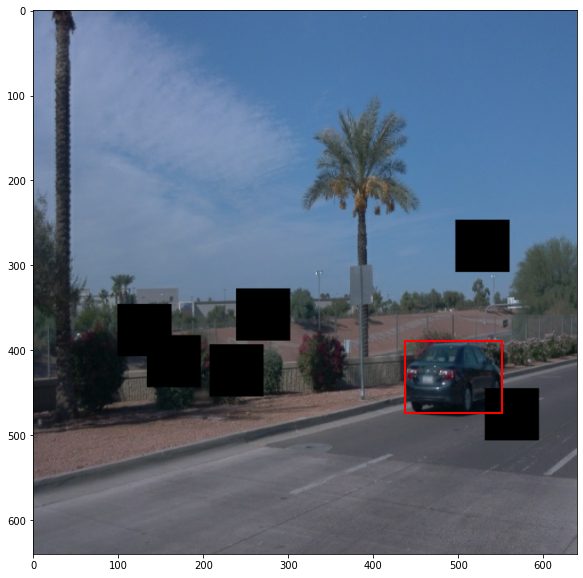

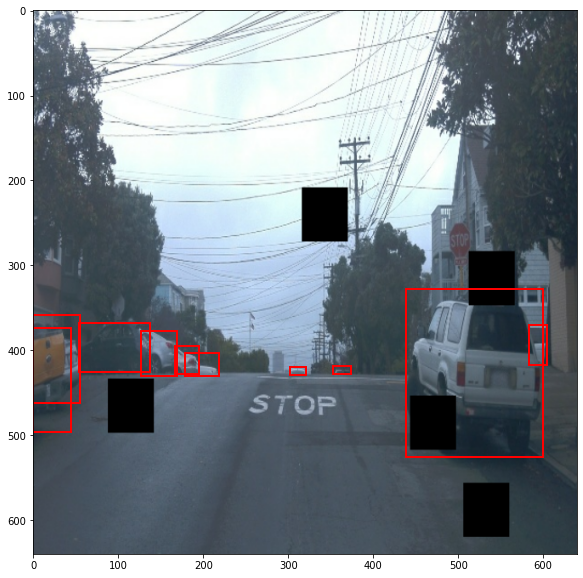

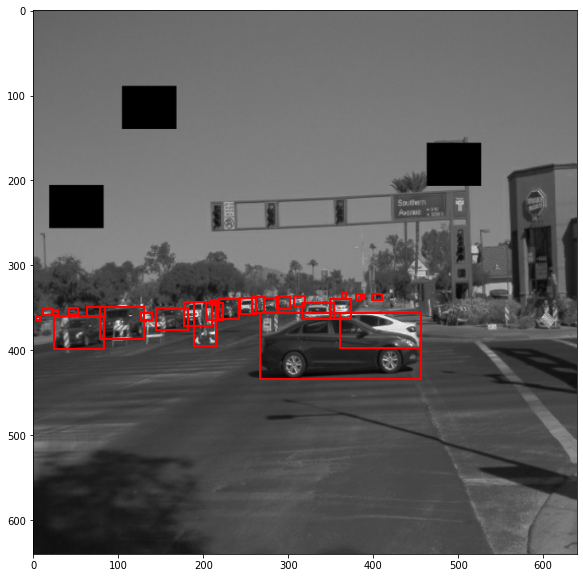

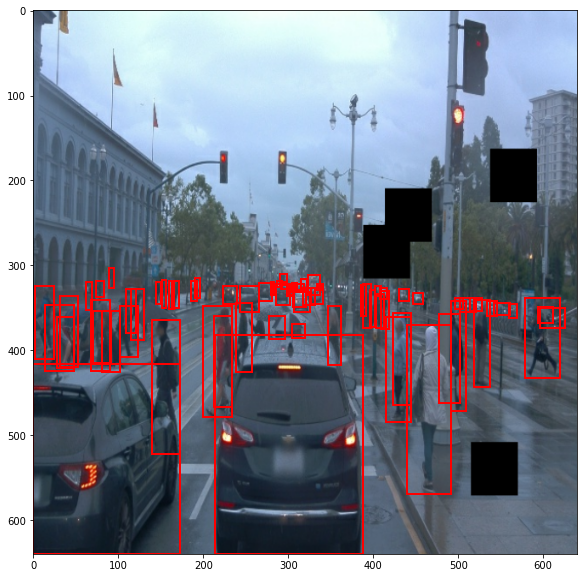

In [18]:
for batch in train_dataset.take(1):
    display_batch(batch)

In [19]:
# Augmentation 6: Add random_image_scale augmentation to Augmentation 1.
train_dataset = get_train_input("./training/reference/augmentation6/pipeline_augmentation6.config")

INFO:tensorflow:Reading unweighted datasets: ['/app/project/data/splits/train/segment-11971497357570544465_1200_000_1220_000_with_camera_labels.tfrecord', '/app/project/data/splits/train/segment-11623618970700582562_2840_367_2860_367_with_camera_labels.tfrecord', '/app/project/data/splits/train/segment-10153695247769592104_787_000_807_000_with_camera_labels.tfrecord', '/app/project/data/splits/train/segment-10072231702153043603_5725_000_5745_000_with_camera_labels.tfrecord', '/app/project/data/splits/train/segment-11060291335850384275_3761_210_3781_210_with_camera_labels.tfrecord', '/app/project/data/splits/train/segment-11846396154240966170_3540_000_3560_000_with_camera_labels.tfrecord', '/app/project/data/splits/train/segment-10786629299947667143_3440_000_3460_000_with_camera_labels.tfrecord', '/app/project/data/splits/train/segment-10923963890428322967_1445_000_1465_000_with_camera_labels.tfrecord', '/app/project/data/splits/train/segment-10526338824408452410_5714_660_5734_660_with_

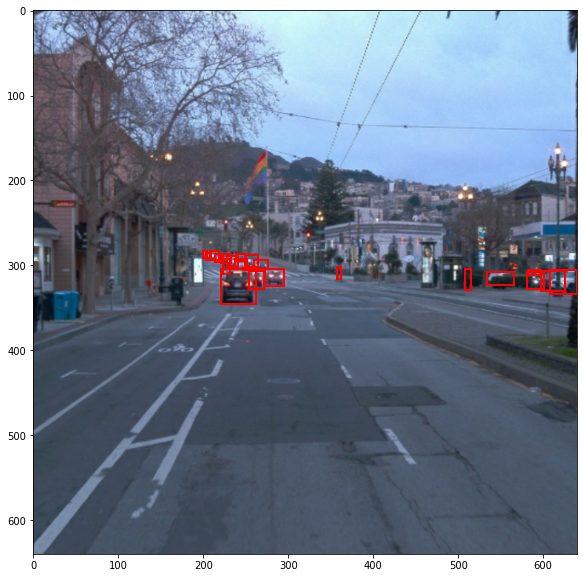

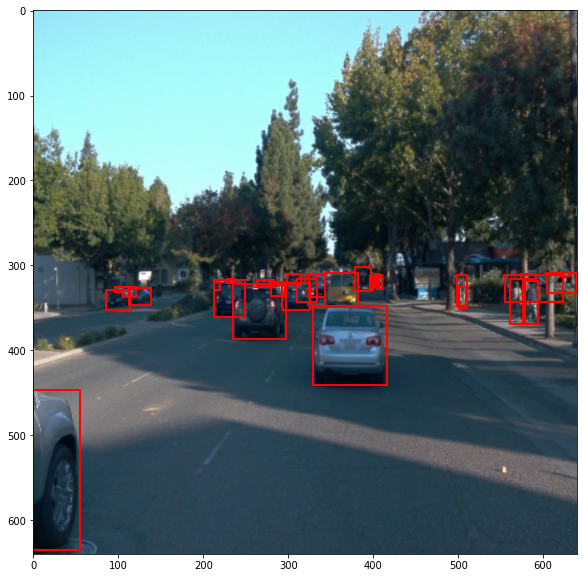

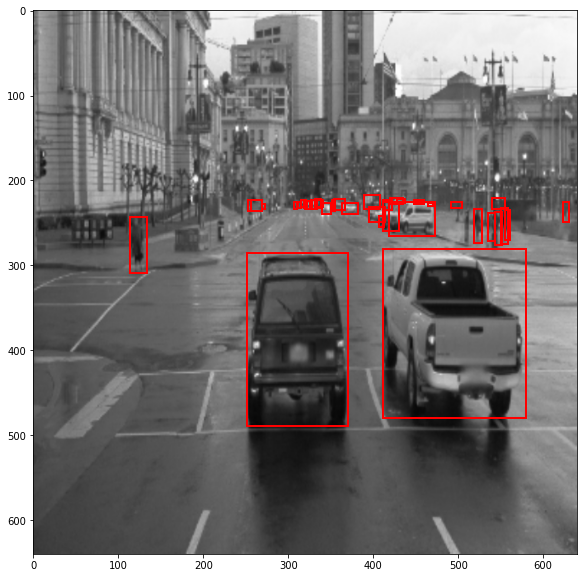

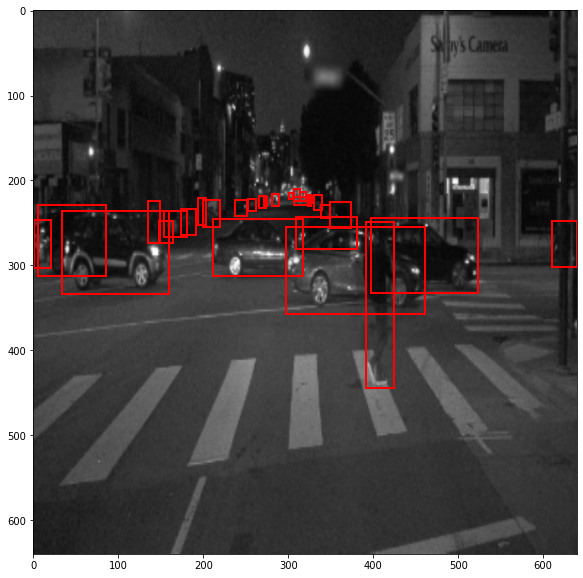

In [21]:
for batch in train_dataset.take(1):
    display_batch(batch)